In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()#载入数据
x_data = digits.data #数据
y_data = digits.target #标签

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data) #分割数据1/4为测试数据，3/4为训练数据

In [3]:
x_data.shape

(1797, 64)

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50) ,max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [5]:
# 数据中心化
def zeroMean(dataMat):
    # 按列求平均，即各个特征的平均
    meanVal = np.mean(dataMat, axis=0) 
    newData = dataMat - meanVal
    return newData, meanVal

def pca(dataMat,top):
    # 数据中心化
    newData,meanVal=zeroMean(dataMat) 
    # np.cov用于求协方差矩阵，参数rowvar=0说明数据一行代表一个样本
    covMat = np.cov(newData, rowvar=0)
    # np.linalg.eig求矩阵的特征值和特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # 对特征值从小到大排序
    eigValIndice = np.argsort(eigVals)
    # 最大的n个特征值的下标
    n_eigValIndice = eigValIndice[-1:-(top+1):-1]
    # 最大的n个特征值对应的特征向量
    n_eigVect = eigVects[:,n_eigValIndice]
    # 低维特征空间的数据
    lowDDataMat = newData*n_eigVect
    # 利用低纬度数据来重构数据
    reconMat = (lowDDataMat*n_eigVect.T) + meanVal
    # 返回低维特征空间的数据和重构的矩阵
    return lowDDataMat,reconMat 

In [6]:
lowDDataMat,reconMat = pca(x_data,2)

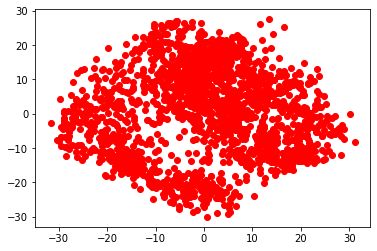

In [7]:
# 重构的数据
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]
plt.scatter(x,y,c='r')
plt.show()

In [8]:
predictions = mlp.predict(x_data)

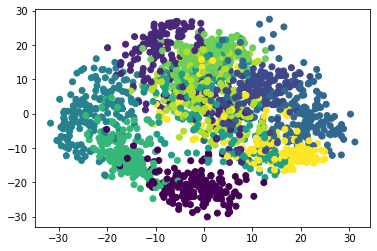

In [9]:
# 重构的数据
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]
plt.scatter(x,y,c=y_data)
plt.show()

In [10]:
lowDDataMat,reconMat = pca(x_data,3)

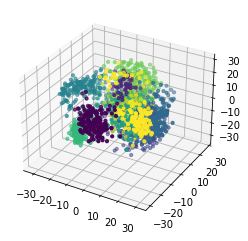

In [11]:
from mpl_toolkits.mplot3d import Axes3D  
x = np.array(lowDDataMat)[:,0]
y = np.array(lowDDataMat)[:,1]
z = np.array(lowDDataMat)[:,2]
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x, y, z, c = y_data, s = 10) #点为红色三角形 

plt.show()